<a href="https://colab.research.google.com/github/kkiyota63/PL4/blob/main/PL4_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

線形計画法

In [1]:
!pip install pulp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 27.4 MB/s eta 0:00:00


In [2]:
import pulp

#最大化する問題を定義
prob = pulp.LpProblem('Juice', pulp.LpMaximize)

#変数を定義
x1 = pulp.LpVariable('x1', lowBound=0,upBound=None,cat='Integar')
x2 = pulp.LpVariable('x2', lowBound=0,upBound=None,cat='Integar')
x3 = pulp.LpVariable('x3', lowBound=0,upBound=None,cat='Integar')

In [12]:
#制約条件を定義
prob += 40*x1 + 5*x2 +20*x3 <= 2000
prob += 30*x1 + 50*x2 +10*x3 <= 3000
prob += 5*x1 + 10*x2 +50*x3 <= 1000

#最大化したい目的関数を定義 (不等式を書かない場合、目的関数として定義される)
prob += 300*x1 + 280*x2 +420*x3

In [11]:
#実際に解く
status = prob.solve()
print(pulp.LpStatus[status])
print('x1 = {} ,x2= {} , x3 = {}'.format(pulp.value(x1),pulp.value(x2),pulp.value(x3)))

Optimal
x1 = 41.225627 ,x2= 33.426184 , x3 = 9.1922006


演習3 配送計画問題

In [19]:
#問題を定義
prob = pulp.LpProblem('logistics', pulp.LpMinimize)

#変数を定義 (w11は、倉庫W1→店舗S1に運ばれる量)
w11 = pulp.LpVariable('w11', lowBound=0,upBound=None,cat='Integar')
w12 = pulp.LpVariable('w12', lowBound=0,upBound=None,cat='Integar')
w13 = pulp.LpVariable('w13', lowBound=0,upBound=None,cat='Integar')
w21 = pulp.LpVariable('w21', lowBound=0,upBound=None,cat='Integar')
w22 = pulp.LpVariable('w22', lowBound=0,upBound=None,cat='Integar')
w23 = pulp.LpVariable('w23', lowBound=0,upBound=None,cat='Integar')

In [20]:
#制約条件を定義

#各店舗の必要量の制約条件
prob += w11 +w21 >=70
prob += w12 +w22 >=40
prob += w13 +w23 >=60

#各倉庫の在庫量の制約条件
prob += w11 +w12 +w13 <=90
prob += w21 +w22 +w23 <=80

#目的関数を定義
prob += 4*w11 + 7*w12 + 12*w13 + 11*w21 + 6*w22 + 3*w23

In [23]:
#実際に解く
status = prob.solve()
print(pulp.LpStatus[status])
print('w11 = {} ,w12= {} , w13 = {}'.format(pulp.value(w11),pulp.value(w12),pulp.value(w13)))
print('w21 = {} ,w22= {} , w23 = {}'.format(pulp.value(w21),pulp.value(w22),pulp.value(w23)))

Optimal
w11 = 70.0 ,w12= 20.0 , w13 = 0.0
w21 = 0.0 ,w22= 20.0 , w23 = 60.0


連続最適化　最急降下法

In [25]:
import torch

In [26]:
a = torch.zeros(2,4)
a

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [34]:
x = torch.tensor(2.5, requires_grad= True)

In [35]:
y = 4.5* x +2

In [36]:
y

tensor(13.2500, grad_fn=<AddBackward0>)

In [37]:
#xに勾配情報を持たせる
y.backward()

In [38]:
x.grad

tensor(4.5000)

演習4 Pytorchを用いた最急降下法

In [39]:
from torch import optim
import matplotlib.pyplot as plt
import numpy as np

In [75]:
#目的関数を設定　楕円
def func(x,y):
  return x**2 + 49 *(y)**2

In [61]:
#初期値を設定
pos_init = [-55.0,-45.0]

In [62]:
#変数を定義
x = torch.tensor(pos_init[0], requires_grad= True)
y = torch.tensor(pos_init[1], requires_grad= True)
params = [x,y]

In [63]:
#値を確認するためのリストを定義
x_list, y_list, f_list = [],[],[]

In [64]:
#最適化を行うためのオブジェクトを定義　SDGはアルゴリズム lrはステップ幅
optimizer = optim.SGD(params, lr=0.02)

In [71]:
#実際に反復して最適化を計算
for i in range(1000):
  #勾配情報を初期化
  optimizer.zero_grad()
  outputs = func(x,y)
  print('Step:{}, x:{:.3},y:{:.3},f:{:.3}'.format(i+1,x.item(),y.item(),outputs.item()))

  #勾配を計算
  outputs.backward()

  #最適化
  optimizer.step()

  x_list.append(x.item())
  y_list.append(y.item())
  f_list.append(outputs.item())

Step:1, x:-1.03e-16,y:-8.4e-17,f:3.57e-31
Step:2, x:-9.86e-17,y:8.07e-17,f:3.29e-31
Step:3, x:-9.47e-17,y:-7.74e-17,f:3.03e-31
Step:4, x:-9.09e-17,y:7.43e-17,f:2.79e-31
Step:5, x:-8.72e-17,y:-7.14e-17,f:2.57e-31
Step:6, x:-8.37e-17,y:6.85e-17,f:2.37e-31
Step:7, x:-8.04e-17,y:-6.58e-17,f:2.18e-31
Step:8, x:-7.72e-17,y:6.31e-17,f:2.01e-31
Step:9, x:-7.41e-17,y:-6.06e-17,f:1.86e-31
Step:10, x:-7.11e-17,y:5.82e-17,f:1.71e-31
Step:11, x:-6.83e-17,y:-5.59e-17,f:1.58e-31
Step:12, x:-6.56e-17,y:5.36e-17,f:1.45e-31
Step:13, x:-6.29e-17,y:-5.15e-17,f:1.34e-31
Step:14, x:-6.04e-17,y:4.94e-17,f:1.23e-31
Step:15, x:-5.8e-17,y:-4.74e-17,f:1.14e-31
Step:16, x:-5.57e-17,y:4.56e-17,f:1.05e-31
Step:17, x:-5.34e-17,y:-4.37e-17,f:9.66e-32
Step:18, x:-5.13e-17,y:4.2e-17,f:8.9e-32
Step:19, x:-4.93e-17,y:-4.03e-17,f:8.2e-32
Step:20, x:-4.73e-17,y:3.87e-17,f:7.56e-32
Step:21, x:-4.54e-17,y:-3.71e-17,f:6.97e-32
Step:22, x:-4.36e-17,y:3.57e-17,f:6.42e-32
Step:23, x:-4.18e-17,y:-3.42e-17,f:5.92e-32
Step:24, x:-4

<ipython-input-74-526369cc29e3>:17: UserWarning: The following kwargs were not used by contour: 'level', 'label'
  plt.contourf(grid_x, grid_y, z,level=25,cmap='pink',label=0.2)


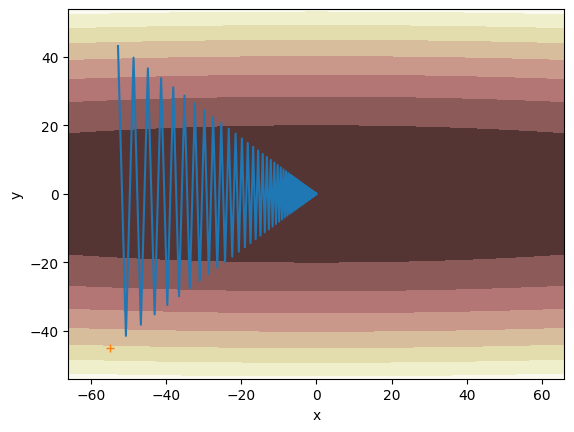

In [74]:
range_x = [-1.2 * np.abs(pos_init[0]), 1.2 * np.abs(pos_init[0])]
range_y = [-1.2 * np.abs(pos_init[1]), 1.2 * np.abs(pos_init[1])]

plt.xlabel('x')
plt.ylabel('y')
plt.xlim(*range_x)
plt.ylim(*range_y)
plt.plot(x_list, y_list)
plt.plot(*pos_init, '+')

gx = np.arange(*range_x,(range_x[1]-range_x[0])/1000)
gy = np.arange(*range_y,(range_y[1]-range_y[0])/1000)

grid_x, grid_y = np.meshgrid(gx, gy)
z = func(grid_x, grid_y)

plt.contourf(grid_x, grid_y, z,level=25,cmap='pink',label=0.2)


色が濃いほど目的関数が良い値

初期解の位置を変えてみる（3箇所以上）．
 ステップ幅（学習率＠機械学習）を変えてみる（3パ
ターン以上）．
 （任意）問題を変えてみる．
 Rosenbrock関数，Ackley関数，Rastrigin関数など
 （任意）最適化アルゴリズムを変えてみる．
 Momentum（SGDメソッドでmomentumファクタを設定）
 Adagrad，Adam，等

組み合わせ最適化

In [76]:
!pip install tsplib95

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.4 MB/s eta 0:00:00
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: networkx
    Found existing installation: networkx 3.2.1
    Uninstalling networkx-3.2.1:
      Successfully uninstalled networkx-3.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [79]:
!pip install ortools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.9/22.9 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 30.2 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [80]:
import ortools.linear_solver.pywraplp as pywraplp
from ortools.constraint_solver import routing_enums_pb2
from ortools.constraint_solver import pywrapcp
import tsplib95
import numpy as np
import matplotlib.pyplot as plt

In [82]:
!wget https://raw.githubusercontent.com/coin-or/jorlib/master/jorlib-core/src/test/resources/tspLib/tsp/eil51.tsp

--2023-11-16 02:08:32--  https://raw.githubusercontent.com/coin-or/jorlib/master/jorlib-core/src/test/resources/tspLib/tsp/eil51.tsp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579 [text/plain]
Saving to: ‘eil51.tsp’

eil51.tsp           100%[===================>]     579  --.-KB/s    in 0s      

2023-11-16 02:08:32 (20.0 MB/s) - ‘eil51.tsp’ saved [579/579]



In [83]:
problem = tsplib95.load('./eil51.tsp').as_name_dict()

In [84]:
problem

{'name': 'eil51',
 'comment': '51-city problem (Christofides/Eilon)',
 'type': 'TSP',
 'dimension': 51,
 'edge_weight_type': 'EUC_2D',
 'node_coords': {1: [37, 52],
  2: [49, 49],
  3: [52, 64],
  4: [20, 26],
  5: [40, 30],
  6: [21, 47],
  7: [17, 63],
  8: [31, 62],
  9: [52, 33],
  10: [51, 21],
  11: [42, 41],
  12: [31, 32],
  13: [5, 25],
  14: [12, 42],
  15: [36, 16],
  16: [52, 41],
  17: [27, 23],
  18: [17, 33],
  19: [13, 13],
  20: [57, 58],
  21: [62, 42],
  22: [42, 57],
  23: [16, 57],
  24: [8, 52],
  25: [7, 38],
  26: [27, 68],
  27: [30, 48],
  28: [43, 67],
  29: [58, 48],
  30: [58, 27],
  31: [37, 69],
  32: [38, 46],
  33: [46, 10],
  34: [61, 33],
  35: [62, 63],
  36: [63, 69],
  37: [32, 22],
  38: [45, 35],
  39: [59, 15],
  40: [5, 6],
  41: [10, 17],
  42: [21, 10],
  43: [5, 64],
  44: [30, 15],
  45: [39, 10],
  46: [32, 39],
  47: [25, 32],
  48: [25, 55],
  49: [48, 28],
  50: [56, 37],
  51: [30, 40]}}

メタヒューリスティックス　遺伝的アルゴリズム

In [88]:
#GAを使って遺伝的アルゴリズムを解く
problem = tsplib95.load('./eil51.tsp')

In [89]:
cities = list(problem.get_nodes())

In [90]:
cities

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51]

In [92]:
num_cities = problem.dimension
num_cities

51

In [97]:
#都市間距離のテーブルを作る　都市の数プラス１のインデックスを作る
distances = np.zeros((num_cities + 1, num_cities + 1))
for c_fr in cities:
  for c_to in [ci for ci in cities if ci != c_fr]:
    distances[c_to][c_fr] = distances[c_fr][c_to] = problem._wfunc(c_fr, c_to)

In [98]:
distances

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 12., ..., 26., 24., 14.],
       [ 0., 12.,  0., ..., 21., 14., 21.],
       ...,
       [ 0., 26., 21., ...,  0., 12., 22.],
       [ 0., 24., 14., ..., 12.,  0., 26.],
       [ 0., 14., 21., ..., 22., 26.,  0.]])

In [99]:
!pip install deap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.2 MB/s eta 0:00:00


In [101]:
from deap import base, creator, tools, algorithms
import random

In [102]:
#個体(解の候補)を定義
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

In [103]:
#メソッドを作るメソッドを作る
toolbox = base.Toolbox()
toolbox.register('indices', random.sample,range(num_cities), num_cities)
toolbox.register('individual', tools.initIterate,creator.Individual, toolbox.indices)

In [107]:
#目的関数を作る
def evaluate(individual):
  summation = 0
  start = individual[0]
  for i in range(1,len(individual)):
    end = individual[i]
    summation += distances[start+1][end+1]
    start = end
  return summation,

#目的関数をtoolboxで登録
toolbox.register('evaluate', evaluate)

In [118]:

toolbox.register('mate', tools.cxPartialyMatched)
#突然変異
toolbox.register('mutate', tools.mutShuffleIndexes,indpb=0.01)
#選択
toolbox.register('select', tools.selTournament,tournsize=16)

In [108]:
#個体の集団を定義
toolbox.register('population', tools.initRepeat, list, toolbox.individual)

In [110]:
#個体数を定義
pop = toolbox.population(n=50)

In [113]:
#初期個体集団の中から一番良い個体を選ぶ
for indi in pop:
  indi.fitness.values = toolbox.evaluate(indi)
hof = tools.ParetoFront()

In [114]:
states_fit = tools.Statistics(lambda ind: ind.fitness.values)

mstats = tools.MultiStatistics(fitness=states_fit)
mstats.register('avg', np.mean)
mstats.register('min', np.min)

In [119]:
pop, log = algorithms.eaSimple(
pop, toolbox, cxpb=0.9, mutpb=0.1,
ngen=10000, halloffame=hof,
stats=mstats)

ストリーミング出力は最後の 5000 行に切り捨てられました。
5001	48    	588.58 	5001	586 	48    
5002	50    	588.46 	5002	586 	50    
5003	44    	595.92 	5003	586 	44    
5004	42    	586.86 	5004	586 	42    
5005	49    	595.76 	5005	586 	49    
5006	44    	588.76 	5006	586 	44    
5007	44    	591.88 	5007	586 	44    
5008	48    	599.34 	5008	586 	48    
5009	40    	588.02 	5009	586 	40    
5010	48    	587.22 	5010	586 	48    
5011	43    	591.32 	5011	586 	43    
5012	42    	595.24 	5012	586 	42    
5013	48    	587.64 	5013	586 	48    
5014	49    	589.12 	5014	586 	49    
5015	44    	586    	5015	586 	44    
5016	48    	593.32 	5016	586 	48    
5017	44    	588.76 	5017	586 	44    
5018	46    	589.76 	5018	586 	46    
5019	44    	586    	5019	586 	44    
5020	44    	591.42 	5020	586 	44    
5021	47    	592.78 	5021	586 	47    
5022	42    	586    	5022	586 	42    
5023	40    	590.02 	5023	586 	40    
5024	48    	588.76 	5024	586 	48    
5025	47    	590.82 	5025	586 	47    
5026	48    	589.2  	5026	586 	48    
5027	5

(0.0, 80.0)

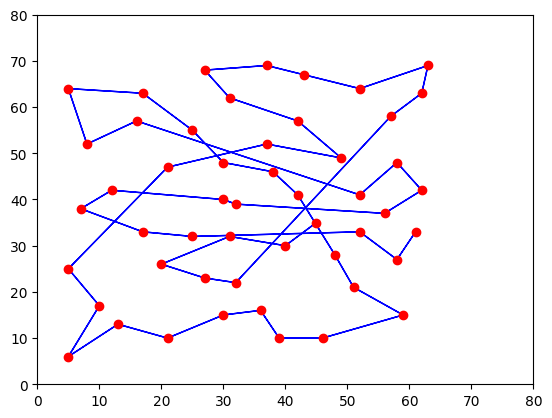

In [121]:
best_ind = tools.selBest(pop, 1)[0]
seq = list(best_ind)

for i, j in zip(seq, seq[1:]):
  st = problem.node_coords[i + 1]
  ed = problem.node_coords[j + 1]
  plt.arrow(st[0], st[1], ed[0] - st[0],ed[1] - st[1], color='blue')

  # 通過した各都市を赤く表示
for city in seq:
    x, y = problem.node_coords[city + 1]
    plt.scatter(x, y, color='red')

plt.xlim(0, 80) # 問題にあわせて調整
plt.ylim(0, 80)